In [9]:
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from preproc.dataloader import Dataloader
data  = Dataloader("../../sample_data/hp.csv").load()
labels = data.columns.values
X = data.to_numpy()
print(labels)

[Sat Dec 24 15:04:16 2022] [info] CSV file ../../sample_data/hp.csv detected.
[Sat Dec 24 15:04:16 2022] [ok] Loaded dataset in ../../sample_data/hp.csv, head & first 2 rows:
Index([' CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6  
[' CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [10]:
from padding import Padding
for i, _ in enumerate(labels[:-1]):
    X = Padding(X, i, 'forestc').run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

[Sat Dec 24 15:04:16 2022] [warn] The column(idx. 0) is not suitable for classification. Turned to RF-Regressor instead.
[Sat Dec 24 15:04:16 2022] [warn] The column(idx. 1) is not suitable for classification. Turned to RF-Regressor instead.
[Sat Dec 24 15:04:16 2022] [warn] The column(idx. 2) is not suitable for classification. Turned to RF-Regressor instead.
[Sat Dec 24 15:04:16 2022] [warn] Every data in this column(idx. 4) has a value. Skipped.
[Sat Dec 24 15:04:16 2022] [warn] Every data in this column(idx. 5) has a value. Skipped.
[Sat Dec 24 15:04:16 2022] [warn] The column(idx. 6) is not suitable for classification. Turned to RF-Regressor instead.
[Sat Dec 24 15:04:17 2022] [warn] Every data in this column(idx. 7) has a value. Skipped.
[Sat Dec 24 15:04:17 2022] [warn] Every data in this column(idx. 8) has a value. Skipped.
[Sat Dec 24 15:04:17 2022] [warn] Every data in this column(idx. 9) has a value. Skipped.
[Sat Dec 24 15:04:17 2022] [warn] Every data in this column(idx. 1

In [11]:
from normalization import Norm
for i, _ in enumerate(labels[:-1]):
    if i == 3:
        continue
    X = Norm(X, i, 'zscore').run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

In [12]:
from sifting import Sifting
idx = len(labels) - 1
X = Sifting(X, 'if', idx).run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

In [13]:
from feature_selection import FeatureSelection
fs = FeatureSelection(X[:, :-1], labels[:-1], X[:, -1], 'forest').run()
fs

[('LSTAT', 0.6125586948093132),
 ('NOX', 0.4641217558108851),
 ('INDUS', 0.4607787757820918),
 ('RM', 0.4218563588761727),
 ('PTRATIO', 0.40816595370606434),
 ('TAX', 0.3483968060108217),
 ('RAD', 0.1960076927492212),
 ('ZN', 0.11685171684284497),
 (' CRIM', 0.10578806703246262),
 ('DIS', 0.06887645216791641),
 ('AGE', 0.0512221377296961),
 ('B', 0.025440310160357183),
 ('CHAS', -0.030923065568084017)]

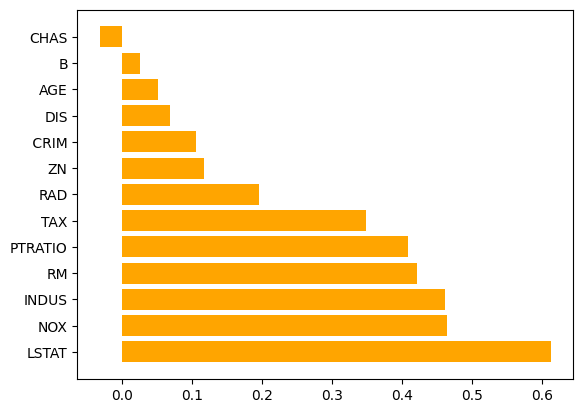

In [14]:
import matplotlib.pyplot as plt
for f in fs:
    plt.barh(f[0], f[1], color='orange')